# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  **one dependent variable and three independent variables.**
>The dataset being investigated contains data about movies such as genre, cast, budget and revenue generated. This will help answer the questions below:
><li><a href="#Q1">Q1. Which genre is the most popular?</a></li>
><li><a href="#Q2">Q2. Which movie is the most recommended?</a></li>
><li><a href="#Q3">Q3. Which movie is the most popular?</a></li>
><li><a href="#Q4">Q4. What are the changes in the number of movies released per decade?</a></li>
><li><a href="#Q5">Q5. Do more recent movies generate a higher revenue?</a></li>
><li><a href="#Q6">Q6. What is the correlation between profit and budget? Are movies with higher budgets more profitable?</a></li>
><li><a href="#Q7">Q7. What is the most popular production company?</a></li>
><li><a href="#Q8">Q8. Does movie runtime affect cost of production?</a></li>
><li><a href="#Q9">Q9. Does rating affect revenue?</a></li>
><li><a href="#Q10">Q10. What are the properties of the movies with high revenue?</a></li>


In [1]:
# import packages and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df= pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.set_option('display.max_columns', 25)
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#showing the data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
#null values
df.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#number of non-null unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
#Number of rows and columns
df.shape

(10866, 21)

In [7]:
#duplicate rows
df.duplicated().sum()

1

### Data Cleaning 
>+ Fixing duplicates
>+ Fixing missing data
>+ incorrect data types

In [8]:
# drop duplicates 
df.drop_duplicates(inplace=True)


In [9]:
#check if there are any duplicates
df.duplicated().sum()

0

In [10]:
# fixing incorrect data types
df['release_date'] = pd.to_datetime(df['release_date'])             

In [11]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [12]:
#fill null values with empty space 
df.fillna(' ', inplace=True)
df.isnull().sum() 

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
#drop revenue and budget colums since we'll use the _adj columns for the analysis
# drop release_date due to errors such as 2066 instead of 1966
df.drop(['revenue', 'budget','release_date'], axis=1, inplace=True)
df.head()


,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.
<a id='Q1'></a>
### Q1. Which genre is the most popular ?

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#  due to multiple values of genre in one cell, first join all of them into one data frame
result=df['genres'].str.cat(sep='|')
result

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Fantasy|Action|Crime|Thriller|Western|Drama|Adventure|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Action|Adventure|Crime|Science Fiction|Fantasy|Action|Adventure|Drama|Science Fiction|Action|Comedy|Science Fiction|Action|Adventure|Science Fiction|Crime|Drama|Mystery|Western|Crime|Action|Thriller|Science Fiction|Action|Adventure|Romance|Fantasy|Family|Drama|War|Adventure|Science Fiction|Action|Family|Science Fiction|Adventure|Mystery|Action|Drama|Action|Drama|Thriller|Drama|Romance|Comedy|Drama|Action|Comedy|Crime|Comedy|Action|Adventure|Drama|Thriller|History|Action|Science Fiction|Thriller|Mystery|Drama|Crime|Action|Science Fiction|Comedy|Music|Thriller|Drama|Adventure|Horror|Comedy|Drama|Thriller|Crime|Drama|Mystery|Adventure|Animation|Co

In [15]:
#count the number of times a genre appears  
genres=pd.Series(result.split('|')).value_counts()
genres

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
                     23
dtype: int64

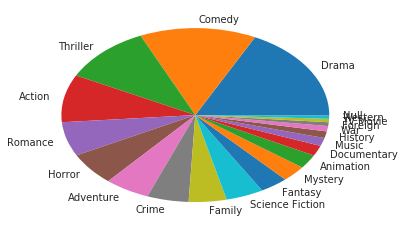

In [16]:
mylabels= ['Drama' ,'Comedy','Thriller','Action','Romance','Horror','Adventure','Crime','Family','Science Fiction','Fantasy',
'Mystery','Animation','Documentary','Music','History','War','Foreign','TV Movie','Western','Null']
plt.pie(genres, labels=mylabels)
plt.show()

In [17]:
df_g= pd.DataFrame(genres, columns=['No. of movies'])
df_g

,No. of movies
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712
Horror,1637
Adventure,1471
Crime,1354
Family,1231
Science Fiction,1229


**OBSERVATION**
>Here we observe that the most popular genre is drama as it appears in 4760 movies 

<a id='Q2'></a>
### Q2. Which movie is the most recommended?
Most recommended movies have the highest vote average which is the highest rating, which means it was the most enjoyable to watch. 

In [18]:
#find highest rating
max_re= df['vote_average'].max()
df_m = df.query('vote_average == {}'.format(max_re))
df_m

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,,14,9.2,2011,0.0,0.0


**OBSERVATION**
>The most recommended movie to watch is the one with the highest vote average which means that it has the highest rating from all the votes counted 

<a id='Q3'></a>
### Q3. Which movie is the most popular?
Popularity by assumption is essentially based on page views of pages related to a film, this is according to **[How is popularity for movies calculated?](https://community-imdb.sprinklr.com/conversations/imdbcom/how-is-popularity-for-movies-calculated/5f4a79818815453dba7f9288)** thus the null values in the homepage column affect popularity of a film.

In [19]:
max_pop= df['popularity'].max()
df_pop = df.query('popularity == {}'.format(max_pop))
df_pop

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


**OBSERVATION**
>The most popular title according to views per page is Jurassic World.

<a id='Q4'></a>
### Q4. What are the changes in the number of movies released per decade?

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Number of movies released per year
year= df.release_year.value_counts(ascending= False)
year


2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [21]:
#number of movies released per decade
decades= df.groupby((df.release_year//10)*10 ).release_year.count()
decades

release_year
1960     362
1970     508
1980    1063
1990    1765
2000    3562
2010    3605
Name: release_year, dtype: int64

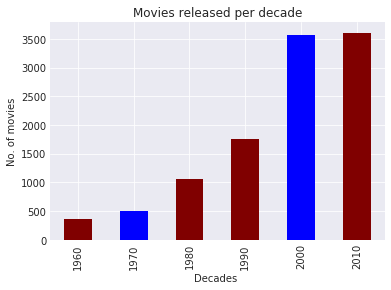

In [22]:
decades.plot(kind='bar', color=['maroon', 'blue'])
plt.title('Movies released per decade')
plt.xlabel("Decades ")
plt.ylabel('No. of movies');

**OBSERVATION**
>In the above bar chart we can note that there is an increase in the number of movies produced per decade. In the next section we shall see how the revenue per decade is also affected.  

<a id='Q5'></a>
### Q5.  Do more recent movies generate a higher revenue?

In [23]:
revenue=df.groupby(['release_year'])['revenue_adj'].mean()

In [24]:
df_r= pd.DataFrame(revenue)
df_r

,revenue_adj
release_year,
1960,3.340991e+07
1961,7.947167e+07
1962,4.856238e+07
1963,3.924580e+07
1964,5.707603e+07
1965,9.057670e+07
1966,1.237527e+07
1967,1.205763e+08
1968,4.255388e+07


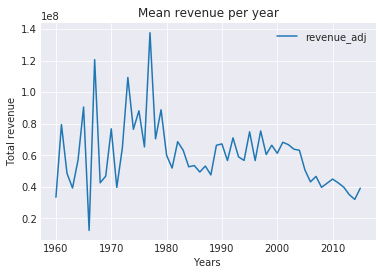

In [25]:
#plot for revenue across the years
df_r.plot()
plt.title('Mean revenue per year')
plt.xlabel("Years ")
plt.ylabel('Total revenue');

In [26]:
#Mean revenue per decade
r_decade=df.groupby((df.release_year//10)*10 ).revenue_adj.mean()
r_decade

release_year
1960    5.660367e+07
1970    8.257098e+07
1980    5.597629e+07
1990    6.429720e+07
2000    5.170859e+07
2010    3.842282e+07
Name: revenue_adj, dtype: float64

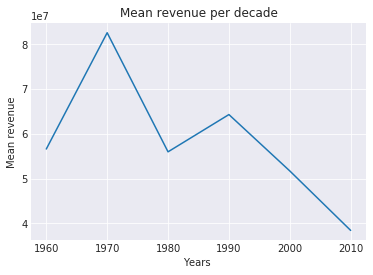

In [27]:
r_decade.plot()
plt.title('Mean revenue per decade')
plt.xlabel("Years ")
plt.ylabel('Mean revenue');

**MEAN REVENUE**
>The mean revenue per year and decade decreases due to an increase in the number of movies produced per year and decade as shown in the previous question. 

In [28]:
#find the proportion change in revenue 
sumr =df.groupby((df.release_year//10)*10 ).revenue_adj.sum()
sumr


release_year
1960    2.049053e+10
1970    4.194606e+10
1980    5.950279e+10
1990    1.134846e+11
2000    1.841860e+11
2010    1.385143e+11
Name: revenue_adj, dtype: float64

In [29]:
countr =df.groupby((df.release_year//10)*10 ).revenue_adj.count()
countr

release_year
1960     362
1970     508
1980    1063
1990    1765
2000    3562
2010    3605
Name: revenue_adj, dtype: int64

In [30]:
#proportion calculation
proportion = countr/sumr
proportion

release_year
1960    1.766670e-08
1970    1.211079e-08
1980    1.786471e-08
1990    1.555278e-08
2000    1.933915e-08
2010    2.602620e-08
Name: revenue_adj, dtype: float64

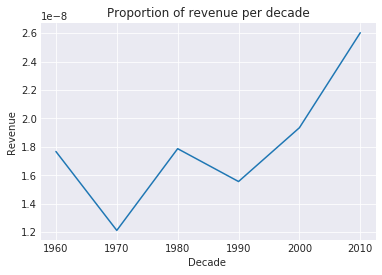

In [31]:
proportion.plot();
plt.title('Proportion of revenue per decade')
plt.xlabel("Decade ")
plt.ylabel('Revenue');

**PROPORTION**
>In the above line graph we can see that the revenue proportion per decade increases.  

In [32]:
rs=df.groupby(['release_year'])['revenue_adj'].sum()

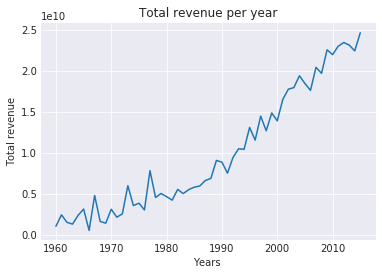

In [33]:
rs.plot();
plt.title('Total revenue per year')
plt.xlabel("Years ")
plt.ylabel('Total revenue');

**OVERALL OBSERVATION**
>The revenue per decade increases and this is due to more movies being produced and also without ignoring the fact that newer movies are likely to produce more revenue 

<a id='Q6'></a>
### Q6. What is the correlation between profit and budget? Are movies with higher budgets more profitable?

In [34]:
#create a dataframe  
df_p=df[['budget_adj','revenue_adj']].copy()
df_p

,budget_adj,revenue_adj
0,1.379999e+08,1.392446e+09
1,1.379999e+08,3.481613e+08
2,1.012000e+08,2.716190e+08
3,1.839999e+08,1.902723e+09
4,1.747999e+08,1.385749e+09
5,1.241999e+08,4.903142e+08
6,1.425999e+08,4.053551e+08
7,9.935996e+07,5.477497e+08
8,6.807997e+07,1.064192e+09
9,1.609999e+08,7.854116e+08


In [35]:
#find the profit which is (revenue- budget)
a = df_p['revenue_adj']
b= df_p['budget_adj']
def subtraction (a,b):
    profit = a - b
    return profit

In [36]:
df_p['profit']= subtraction (a,b)
df_p

,budget_adj,revenue_adj,profit
0,1.379999e+08,1.392446e+09,1.254446e+09
1,1.379999e+08,3.481613e+08,2.101614e+08
2,1.012000e+08,2.716190e+08,1.704191e+08
3,1.839999e+08,1.902723e+09,1.718723e+09
4,1.747999e+08,1.385749e+09,1.210949e+09
5,1.241999e+08,4.903142e+08,3.661143e+08
6,1.425999e+08,4.053551e+08,2.627551e+08
7,9.935996e+07,5.477497e+08,4.483897e+08
8,6.807997e+07,1.064192e+09,9.961120e+08
9,1.609999e+08,7.854116e+08,6.244116e+08


>**What is correlation?**\
>Correlation is a statistic that measures the degree to which two variables move in relation to each other.Correlation shows the strength of a relationship between two variables and is expressed numerically by the correlation coefficient. The correlation coefficient's values range between -1.0 and 1.0.\
>A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one security moves, either up or down, the other security moves in the same direction. A perfect negative correlation means that two assets move in opposite directions, while a zero correlation implies no linear relationship at all.\
>[Meaning of correlation](https://www.investopedia.com/terms/c/correlation.asp)

In [37]:
#check the correlation
df_p.corr()

,budget_adj,revenue_adj,profit
budget_adj,1.000000,0.646627,0.472926
revenue_adj,0.646627,1.000000,0.977917
profit,0.472926,0.977917,1.000000


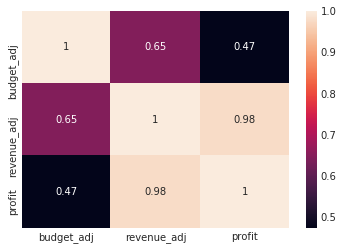

In [38]:
sns.heatmap(df_p.corr(),annot = True);

**Heatmap**
Values greater than 0 show positive correlation with 1 being the highest. 

In [39]:
df_p['profit'].corr(df_p['budget_adj'])

0.47292573242906716

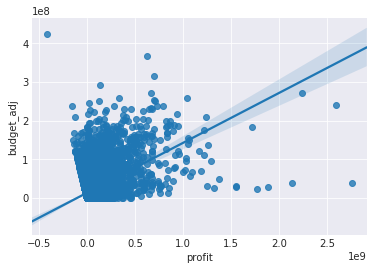

In [40]:
#seaborn regression plot for correlation between budget and profit
sns.regplot(x= df_p['profit'], y=df_p['budget_adj']);

**OBSERVATION**
>In the above plot we observe a positive correlation. This means that an increase in budget then the higher the profit.\
>Thus showing higher budgets are more profitable

<a id='Q7'></a>
### Q7. What is the most popular production company?

>Not accurate due to 1030 null values

In [41]:
#List all the production companies
res=df['production_companies'].str.cat(sep='|')
res

'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu|Village Roadshow Pictures|Kennedy Miller Productions|Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel|Lucasfilm|Truenorth Productions|Bad Robot|Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films|Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures|Paramount Pictures|Skydance Productions|Twentieth Century Fox Film Corporation|Scott Free Productions|Mid Atlantic Films|International Traders|TSG Entertainment|Universal Pictures|Illumination Entertainment|Walt Disney Pictures|Pixar Animation Studios|Walt Disney Studios Motion Pictures|Columbia Pictures|Danjaq|B24|Village Roadshow Pictures|Dune Entertainment|Anarchos Productions|Warner Bros.|DNA Films|Universal Pictures International (UPI)|Film4|Columbia Pictures|Happy Madison Productions|Marvel Studios|Prime Focus|Revolution Sun Studios|Double Feature Films|The Weinstein Company|F

In [42]:
va=pd.Series(res.split('|')).value_counts()
va

                                                1030
Universal Pictures                               522
Warner Bros.                                     509
Paramount Pictures                               431
Twentieth Century Fox Film Corporation           282
Columbia Pictures                                272
New Line Cinema                                  219
Metro-Goldwyn-Mayer (MGM)                        218
Walt Disney Pictures                             214
Touchstone Pictures                              178
Columbia Pictures Corporation                    160
TriStar Pictures                                 147
Miramax Films                                    139
Relativity Media                                 108
Regency Enterprises                               95
Canal+                                            92
DreamWorks SKG                                    88
Village Roadshow Pictures                         88
20th Century Fox                              

In [43]:
pd.DataFrame(va,columns= ['No.of movies produced'])

,No.of movies produced
,1030
Universal Pictures,522
Warner Bros.,509
Paramount Pictures,431
Twentieth Century Fox Film Corporation,282
Columbia Pictures,272
New Line Cinema,219
Metro-Goldwyn-Mayer (MGM),218
Walt Disney Pictures,214
Touchstone Pictures,178


**OBSERVATION**
>The top four production companies are Universal Pictures , warner Bros, paramount Pictures and Twentieth Century Fox Film corporation. This is highly expected since they are the most known in the movie industry.\
>It is important to note 'walt disney pictures' is not stated here which might be an error in the dataset as it is listed here [Major film companies](https://en.wikipedia.org/wiki/Major_film_studios)\
>Due to the null values in this column errors are expected.


<a id='Q8'></a>
### Q8. Does movie runtime affect cost of production?

In [44]:
#a comparison between runtime and production cost
df_run=df[['runtime','budget_adj']].copy()
df_run

,runtime,budget_adj
0,124,1.379999e+08
1,120,1.379999e+08
2,119,1.012000e+08
3,136,1.839999e+08
4,137,1.747999e+08
5,156,1.241999e+08
6,125,1.425999e+08
7,141,9.935996e+07
8,91,6.807997e+07
9,94,1.609999e+08


In [45]:
#correlation
df_run.corr()

,runtime,budget_adj
runtime,1.000000,0.221127
budget_adj,0.221127,1.000000


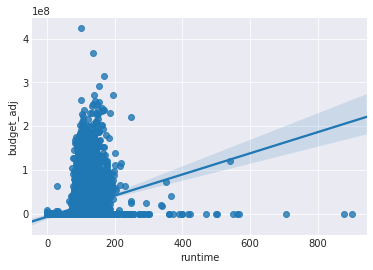

In [46]:
#check the correlation between runtime and cost of production 
sns.regplot(x=df_run['runtime'], y=df_run['budget_adj']);

**OBSERVATION**
>This is a positive correlation shown above but it is low.\
>Movie runtime is how long the movie is and cost of production is the budget.

Therefore, as the runtime increases then the cost of production increases, but due to low positive correlation then the effect of runtime on the cost of production is minimal. 

<a id='Q9'></a>
### Q9. Does rating affect  revenue?

In [47]:
#create a dataframe
df_pr=df[['vote_average','revenue_adj']].copy()
df_pr

,vote_average,revenue_adj
0,6.5,1.392446e+09
1,7.1,3.481613e+08
2,6.3,2.716190e+08
3,7.5,1.902723e+09
4,7.3,1.385749e+09
5,7.2,4.903142e+08
6,5.8,4.053551e+08
7,7.6,5.477497e+08
8,6.5,1.064192e+09
9,8.0,7.854116e+08


In [48]:
#find correlation
df_pr.corr()

,vote_average,revenue_adj
vote_average,1.000000,0.193062
revenue_adj,0.193062,1.000000


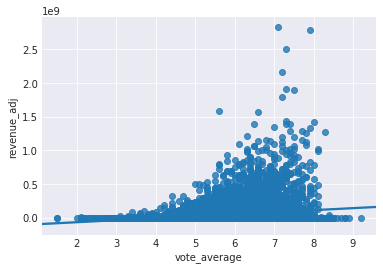

In [49]:
#regression plot
sns.regplot(x=df_pr['vote_average'], y=df_pr['revenue_adj']);

**OBSERVATION**
>This is somehow a positive correlation as it is slightly close to a zero correlation.\
>Since data on rating(vote_average) is collected independently from where the figures of the revenue is collected, it does not give a true picture of how many people have actually watched the film inorder for the rating to impact the revenue. 

Therefore, as the rating increases then the revenue increases, but due to low positive correlation then the effect of rating on the revenue generated is minimal. 

<a id='Q10'></a>
### Q10. What are the properties of the movies with high revenue?

In [50]:
#find the highest revenue 
max_reve= df['revenue_adj'].max()
df_reve = df.query('revenue_adj == {}'.format(max_reve))
df_reve

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09


In [51]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**OBSERVATION**
>The movie selected with the highest revenue has the following property:
>* It is above the 75th percentile in popularity,runtime,vote count, vote average and budget in the entire dataset.\

>This means that movies to have a high revenue should have the above property

In [52]:
#overall correlation
df.corr()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
runtime,-0.088368,0.139032,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


<a id='conclusions'></a>
## Conclusions

>On completion of the analysis of the movie dataset all the questions posed have been answered.It is also important to note that, movies with high revenue have a runtime of 111 and above. We also note that the ratings fall between 5 and 6 with a mean of 5.98.  
>Under each question an **observation** has been stated for better understanding of the analysis. 

>**Limitation**  
>Missing data can reduce the statistical power of a study and give biased estimates, this can bring about invalid conclusions. In this analysis there were 1030 null rows in the production company column which may have given an improper conclusion which company was the most popular one since that is a huge difference. The rest of the missing data did not have a huge impact on the analysis.     
